# NDVI Prediction for Vegetable Health

In [ ]:
!pip install earthengine-api
!pip install ipygee
!pip install sktime

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.8 MB/s eta 0:00:00
  Created wheel for ipygee: filename=ipygee-0.0.18-py3-none-any.whl size=41203 sha256=290b4749bede48be343bbd9c3106036ec88c66c4001f387b5bf03c5bc68106ec
  Stored in directory: /root/.cache/pip/wheels/6c/50/ac/d40610837fb4e308655017ff83aa14f9cb45adcbbc5eb501f0
  Created wheel for geetools: filename=geetools-0.6.14-py3-none-any.whl size=92087 sha256=72fca6c29b476b12f3c037736fc09cbdad1e69bedc58e2f01f1fc72d79f862ef
  Stored in directory: /root/.cache/pip/wheels/e9/a8/7f/40bf5aafcc334b20cd12d0328aff7861e8ea655c20190967fb
Successfully built ipygee geetools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import ee
ee.Authenticate()
ee.Initialize()

In [ ]:
#Import dependancies
import pandas as pd
from ipygee import *
import folium
from folium import plugins
from IPython.display import Image

In [ ]:
#THARAKA
AOI = ee.Geometry.Polygon([[[37.994538894508764,-0.37875237771995485],
                            [38.11470185837595,-0.41514371565121994],
                            [38.09204255661814,-0.2860568042727248],
                            [37.99934541306345,-0.2723240571868562]]])

In [ ]:
startdate = ee.Date.fromYMD(2018, 1, 1);
enddate = ee.Date.fromYMD(2019, 12, 26);

collection = ee.ImageCollection("COPERNICUS/S2").filterDate(startdate, enddate).filterBounds(AOI).filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 0.1);

In [ ]:
collection

In [ ]:
S2 = collection.median().clip(AOI).divide(10000)
vis_params = {'min':0, 'max':0.4, 'bands':['B4', 'B3', 'B2']}

In [ ]:
from google.colab.patches import cv2_imshow
(collection.median())

In [ ]:
NDVI = S2.normalizedDifference(['B8', 'B4']).rename('NDVI')
ndvi_params = {'min': 0, 'max': 0.8, 'palette': ['red', 'yellow','green']}

In [ ]:
startDate = ee.Date.fromYMD(2015, 1, 1)
endDate = ee.Date.fromYMD(2020, 10, 1)

In [ ]:
s2_cropland = ee.ImageCollection("COPERNICUS/S2").filterDate(startDate, endDate).filterBounds(AOI).filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 1)
NDVI_prosperine = s2_cropland.map(lambda image: image.normalizedDifference(['B8', 'B4']).rename('NDVI').copyProperties(image, ['system:time_start']))

In [ ]:
ndvi = chart.Image.series(**{'imageCollection': NDVI_prosperine,
                             'region':AOI,
                             'reducer':ee.Reducer.mean(),
                             'scale':20,
                             'xProperty':'system:time_start'})

In [ ]:
ndvi.renderWidget(width='100%')

In [ ]:
ndvi_df = ndvi.dataframe
ndvi_df.head(36)

,NDVI
2016-07-23 07:57:26.393,0.228288
2016-07-23 07:57:26.393,0.228288
2016-08-02 07:55:56.538,0.209845
2016-08-02 07:55:56.538,0.209845
2016-10-21 07:53:53.080,0.165893
2016-10-21 07:53:53.085,0.165893
2016-12-20 07:55:50.137,0.534677
2017-06-28 07:57:49.590,0.244075
2017-08-17 07:55:45.980,0.193925
2017-09-16 07:57:48.590,0.162874


<Axes: >

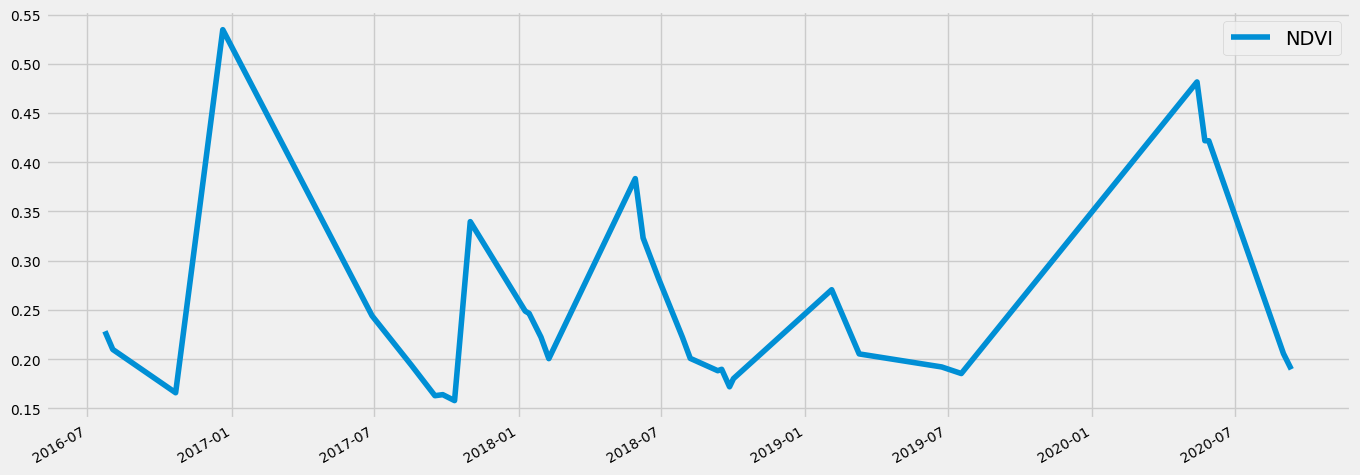

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sns


matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')

ndvi_df.plot(figsize=(15,6))

In [ ]:
ndvi_df.reset_index(inplace=True)
ndvi_df.head()

,index,NDVI
0,2016-07-23 07:57:26.393,0.228288
1,2016-07-23 07:57:26.393,0.228288
2,2016-08-02 07:55:56.538,0.209845
3,2016-08-02 07:55:56.538,0.209845
4,2016-10-21 07:53:53.080,0.165893


In [ ]:
ndvi_df['index'] = ndvi_df['index'].dt.date
ndvi_df['index'] = pd.to_datetime(ndvi_df['index'], format='%Y-%m')
ndvi_df = ndvi_df.set_index('index')

In [ ]:
index = ndvi_df.index
is_duplicate = index.duplicated(keep='first')
not_duplicate = ~is_duplicate
ndvi_new = ndvi_df[not_duplicate]
ndvi_new.head()

,NDVI
index,
2016-07-23,0.228288
2016-08-02,0.209845
2016-10-21,0.165893
2016-12-20,0.534677
2017-06-28,0.244075


                NDVI
index               
2016-07-23  0.228288
2016-07-24  0.226444
2016-07-25  0.224600
2016-07-26  0.222755
2016-07-27  0.220911


<Axes: xlabel='index'>

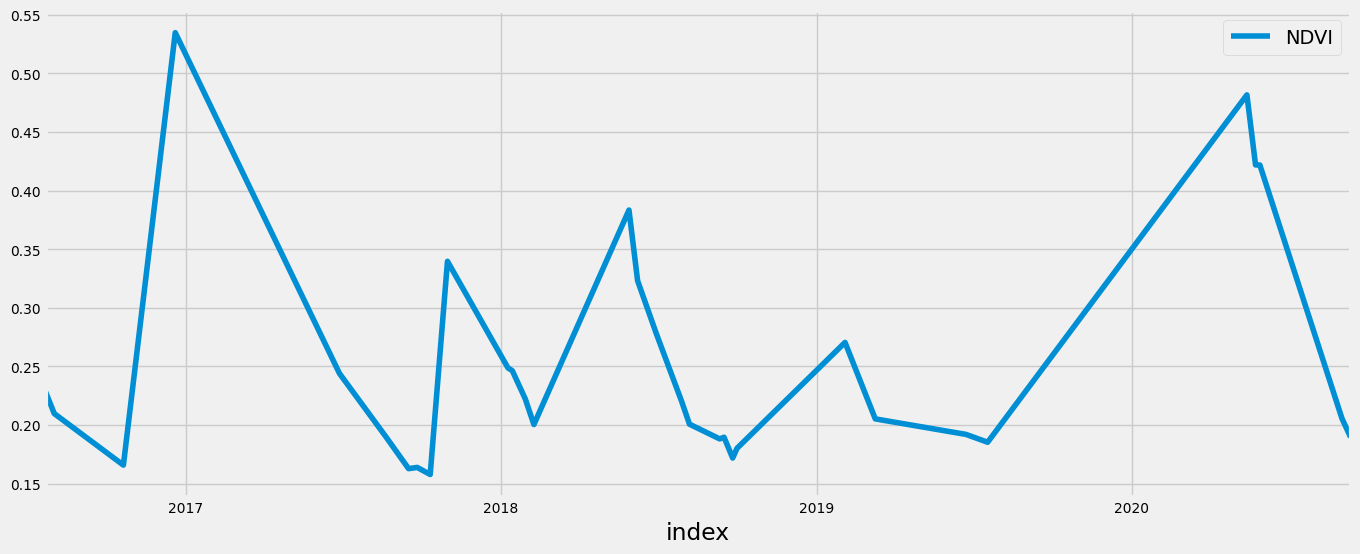

In [ ]:
upsampled = ndvi_new.resample('D')
interpolated = upsampled.interpolate(method='linear')

print(interpolated.head())

interpolated.plot(figsize=(15,6))

In [ ]:

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
values = interpolated.values

final_df = series_to_supervised(values, 14, 1)

final_df.head(14)

,var1(t-14),var1(t-13),var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
14,0.228288,0.226444,0.224600,0.222755,0.220911,0.219067,0.217223,0.215378,0.213534,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648
15,0.226444,0.224600,0.222755,0.220911,0.219067,0.217223,0.215378,0.213534,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648,0.207098
16,0.224600,0.222755,0.220911,0.219067,0.217223,0.215378,0.213534,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648,0.207098,0.206549
17,0.222755,0.220911,0.219067,0.217223,0.215378,0.213534,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648,0.207098,0.206549,0.206000
18,0.220911,0.219067,0.217223,0.215378,0.213534,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648,0.207098,0.206549,0.206000,0.205450
19,0.219067,0.217223,0.215378,0.213534,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648,0.207098,0.206549,0.206000,0.205450,0.204901
20,0.217223,0.215378,0.213534,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648,0.207098,0.206549,0.206000,0.205450,0.204901,0.204351
21,0.215378,0.213534,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648,0.207098,0.206549,0.206000,0.205450,0.204901,0.204351,0.203802
22,0.213534,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648,0.207098,0.206549,0.206000,0.205450,0.204901,0.204351,0.203802,0.203253
23,0.211690,0.209845,0.209296,0.208747,0.208197,0.207648,0.207098,0.206549,0.206000,0.205450,0.204901,0.204351,0.203802,0.203253,0.202703


In [ ]:
final_df.shape

(1497, 15)

In [ ]:
#first 4 years is 365*4 days
values = final_df.values
train = values[:1460, :]
test = values[1460:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [ ]:
#Reshaping input data as 3D

train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1460, 1, 14) (1460,) (37, 1, 14) (37,)


In [ ]:
import keras
from keras import layers, models, Sequential


def create_model():
  model = Sequential()
  model.add(layers.LSTM(28, input_shape=(train_X.shape[1], train_X.shape[2])))
  model.add(layers.Dense(1))
  model.compile(loss='mae', optimizer='adam')
  return model

Epoch 1/50
49/49 - 4s - loss: 0.1203 - val_loss: 0.0564 - 4s/epoch - 80ms/step
Epoch 2/50
49/49 - 0s - loss: 0.0232 - val_loss: 0.0447 - 208ms/epoch - 4ms/step
Epoch 3/50
49/49 - 0s - loss: 0.0213 - val_loss: 0.0395 - 203ms/epoch - 4ms/step
Epoch 4/50
49/49 - 0s - loss: 0.0189 - val_loss: 0.0436 - 200ms/epoch - 4ms/step
Epoch 5/50
49/49 - 0s - loss: 0.0185 - val_loss: 0.0459 - 212ms/epoch - 4ms/step
Epoch 6/50
49/49 - 0s - loss: 0.0184 - val_loss: 0.0417 - 203ms/epoch - 4ms/step
Epoch 7/50
49/49 - 0s - loss: 0.0180 - val_loss: 0.0342 - 217ms/epoch - 4ms/step
Epoch 8/50
49/49 - 0s - loss: 0.0163 - val_loss: 0.0309 - 195ms/epoch - 4ms/step
Epoch 9/50
49/49 - 0s - loss: 0.0134 - val_loss: 0.0379 - 186ms/epoch - 4ms/step
Epoch 10/50
49/49 - 0s - loss: 0.0165 - val_loss: 0.0317 - 216ms/epoch - 4ms/step
Epoch 11/50
49/49 - 0s - loss: 0.0137 - val_loss: 0.0366 - 204ms/epoch - 4ms/step
Epoch 12/50
49/49 - 0s - loss: 0.0159 - val_loss: 0.0300 - 193ms/epoch - 4ms/step
Epoch 13/50
49/49 - 0s - lo

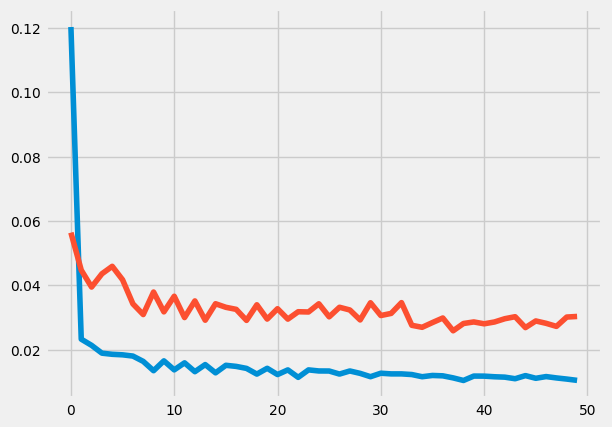

In [ ]:
lstm_model_2 = create_model()

#fit model
history = lstm_model_2.fit(train_X, train_y, epochs=50, batch_size=30, validation_data = (test_X, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

In [ ]:

#Model Evaluation
from sklearn.metrics import mean_squared_error

yhat = lstm_model_2.predict(test_X)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[2])

mse = mean_squared_error(test_y, yhat)

print(f"The MSE is {mse}")

2/2 [==============================] - 0s 6ms/step
The MSE is 0.0009218068553832586


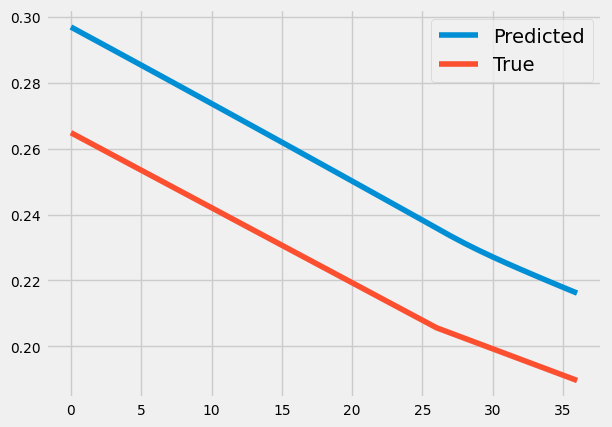

In [ ]:
plt.plot(range(len(test_y)), yhat, label='Predicted')
plt.plot(range(len(test_y)), test_y, label='True')
plt.legend()

# Temperature Forecasting

In [ ]:
modis_lst = collection.select("LST_Day_1km").median().multiply(0.02)

In [ ]:
startDate = ee.Date.fromYMD(2018, 1, 1)
endDate = ee.Date.fromYMD(2022, 1, 1)

In [ ]:
s2_cropland = ee.ImageCollection("MODIS/006/MOD11A1").filterDate(startdate, enddate).filterBounds(AOI)
temp_ = s2_cropland.map(lambda image: image.select("LST_Day_1km").rename('hi').copyProperties(image, ['system:time_start']))

In [ ]:
temp = chart.Image.series(**{'imageCollection':temp_ ,
                             'region':AOI,
                             'reducer':ee.Reducer.median(),
                             'scale':1000,
                             'xProperty':'system:time_start'})

In [ ]:
temp.renderWidget(width='100%')

In [ ]:
ndvi_df = ndvi.dataframe
ndvi_df /= 1000
ndvi_df.head(36)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sns


matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')

ndvi_df.plot(figsize=(15,6))

In [ ]:
ndvi_df['index'] = ndvi_df['index'].dt.date
ndvi_df['index'] = pd.to_datetime(ndvi_df['index'], format='%Y-%m')
ndvi_df = ndvi_df.set_index('index')

In [ ]:
index = ndvi_df.index
is_duplicate = index.duplicated(keep='first')
not_duplicate = ~is_duplicate
ndvi_new = ndvi_df[not_duplicate]
ndvi_new.head()

In [ ]:
index = ndvi_df.index
is_duplicate = index.duplicated(keep='first')
not_duplicate = ~is_duplicate
ndvi_new = ndvi_df[not_duplicate]
ndvi_new.head()

In [ ]:

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
values = interpolated.values

final_df = series_to_supervised(values, 14, 1)

final_df.head(14)

In [ ]:
#first 4 years is 365*4 d'
lose _last = final_df.values
SF_new'train = values[:600, :]
test = values[600:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [ ]:
#Reshaping input data as 3D

train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
import keras
from keras import layers, models, Sequential


def create_model():
  model = Sequential()
  model.add(layers.LSTM(units=28, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))#, ))
  model.add(layers.LSTM(units = 28, return_sequences=True)),
  #model.add(layers.LSTM(28))
  #model.add(layers.LSTM(28))


  model.add(layers.Dense(1))
  model.compile(loss='mae', optimizer='adam')
  #print(model.summary)
  return model